In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
for i in df:
    if (df[i].dtype==object):
        print(i)
        print(df[i].unique())

gender
['M' 'F']
NationalITy
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID
['A' 'B' 'C']
Topic
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester
['F' 'S']
Relation
['Father' 'Mum']
ParentAnsweringSurvey
['Yes' 'No']
ParentschoolSatisfaction
['Good' 'Bad']
StudentAbsenceDays
['Under-7' 'Above-7']
Class
['M' 'L' 'H']


### Visualize just the categorical features individually

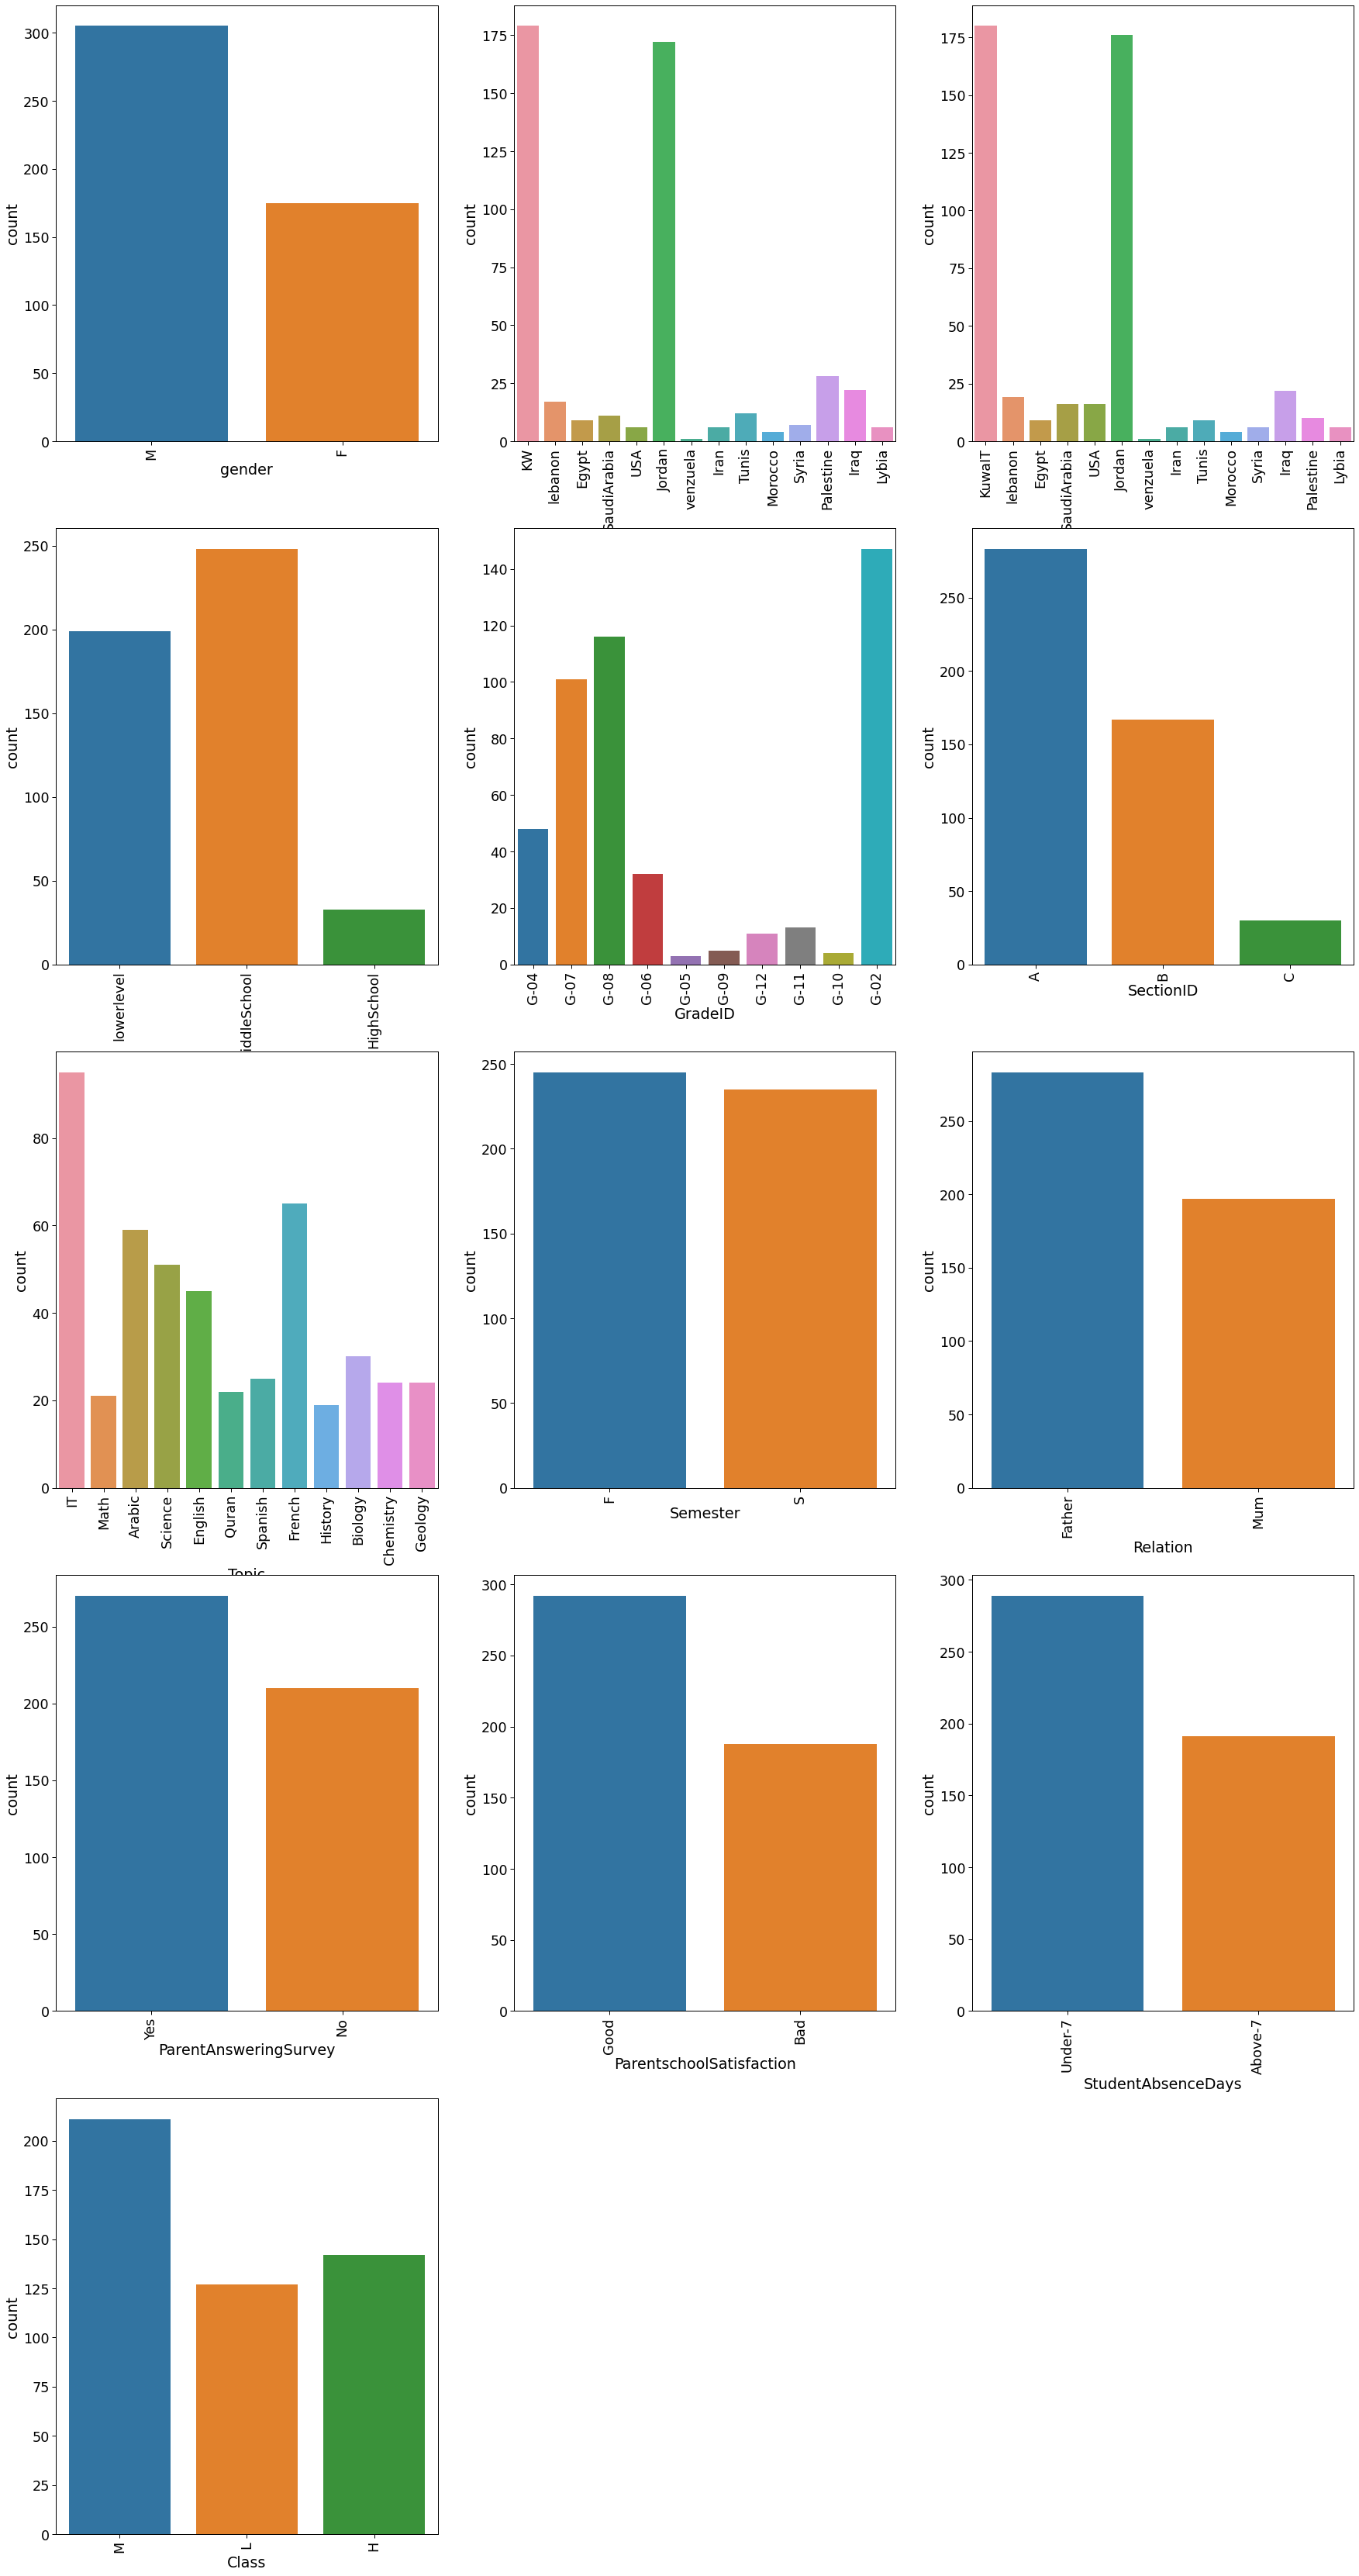

In [7]:
j=1
sns.set_context("paper", font_scale=2.0)
plt.subplots(figsize=(30,60))
for i in df.columns:
    if df[i].dtype==object:
        plt.subplot(5,3,j)
        sns.countplot(x=i,data=df)
        plt.xticks(rotation=90)
        j+=1

plt.show()

### Assumptions 
1.Certain Countries have more students that any other countries and they show extreme features in every variable so no certian inference can be made.

2.ParentsSchoolSatisfaction, Parent AnsweringSurvey, Relation,Semester also give no informative asssumption.

3.Topic,GradeID,SectionID,StageID,Class are of importance.

###  Categorical features in relation to each other

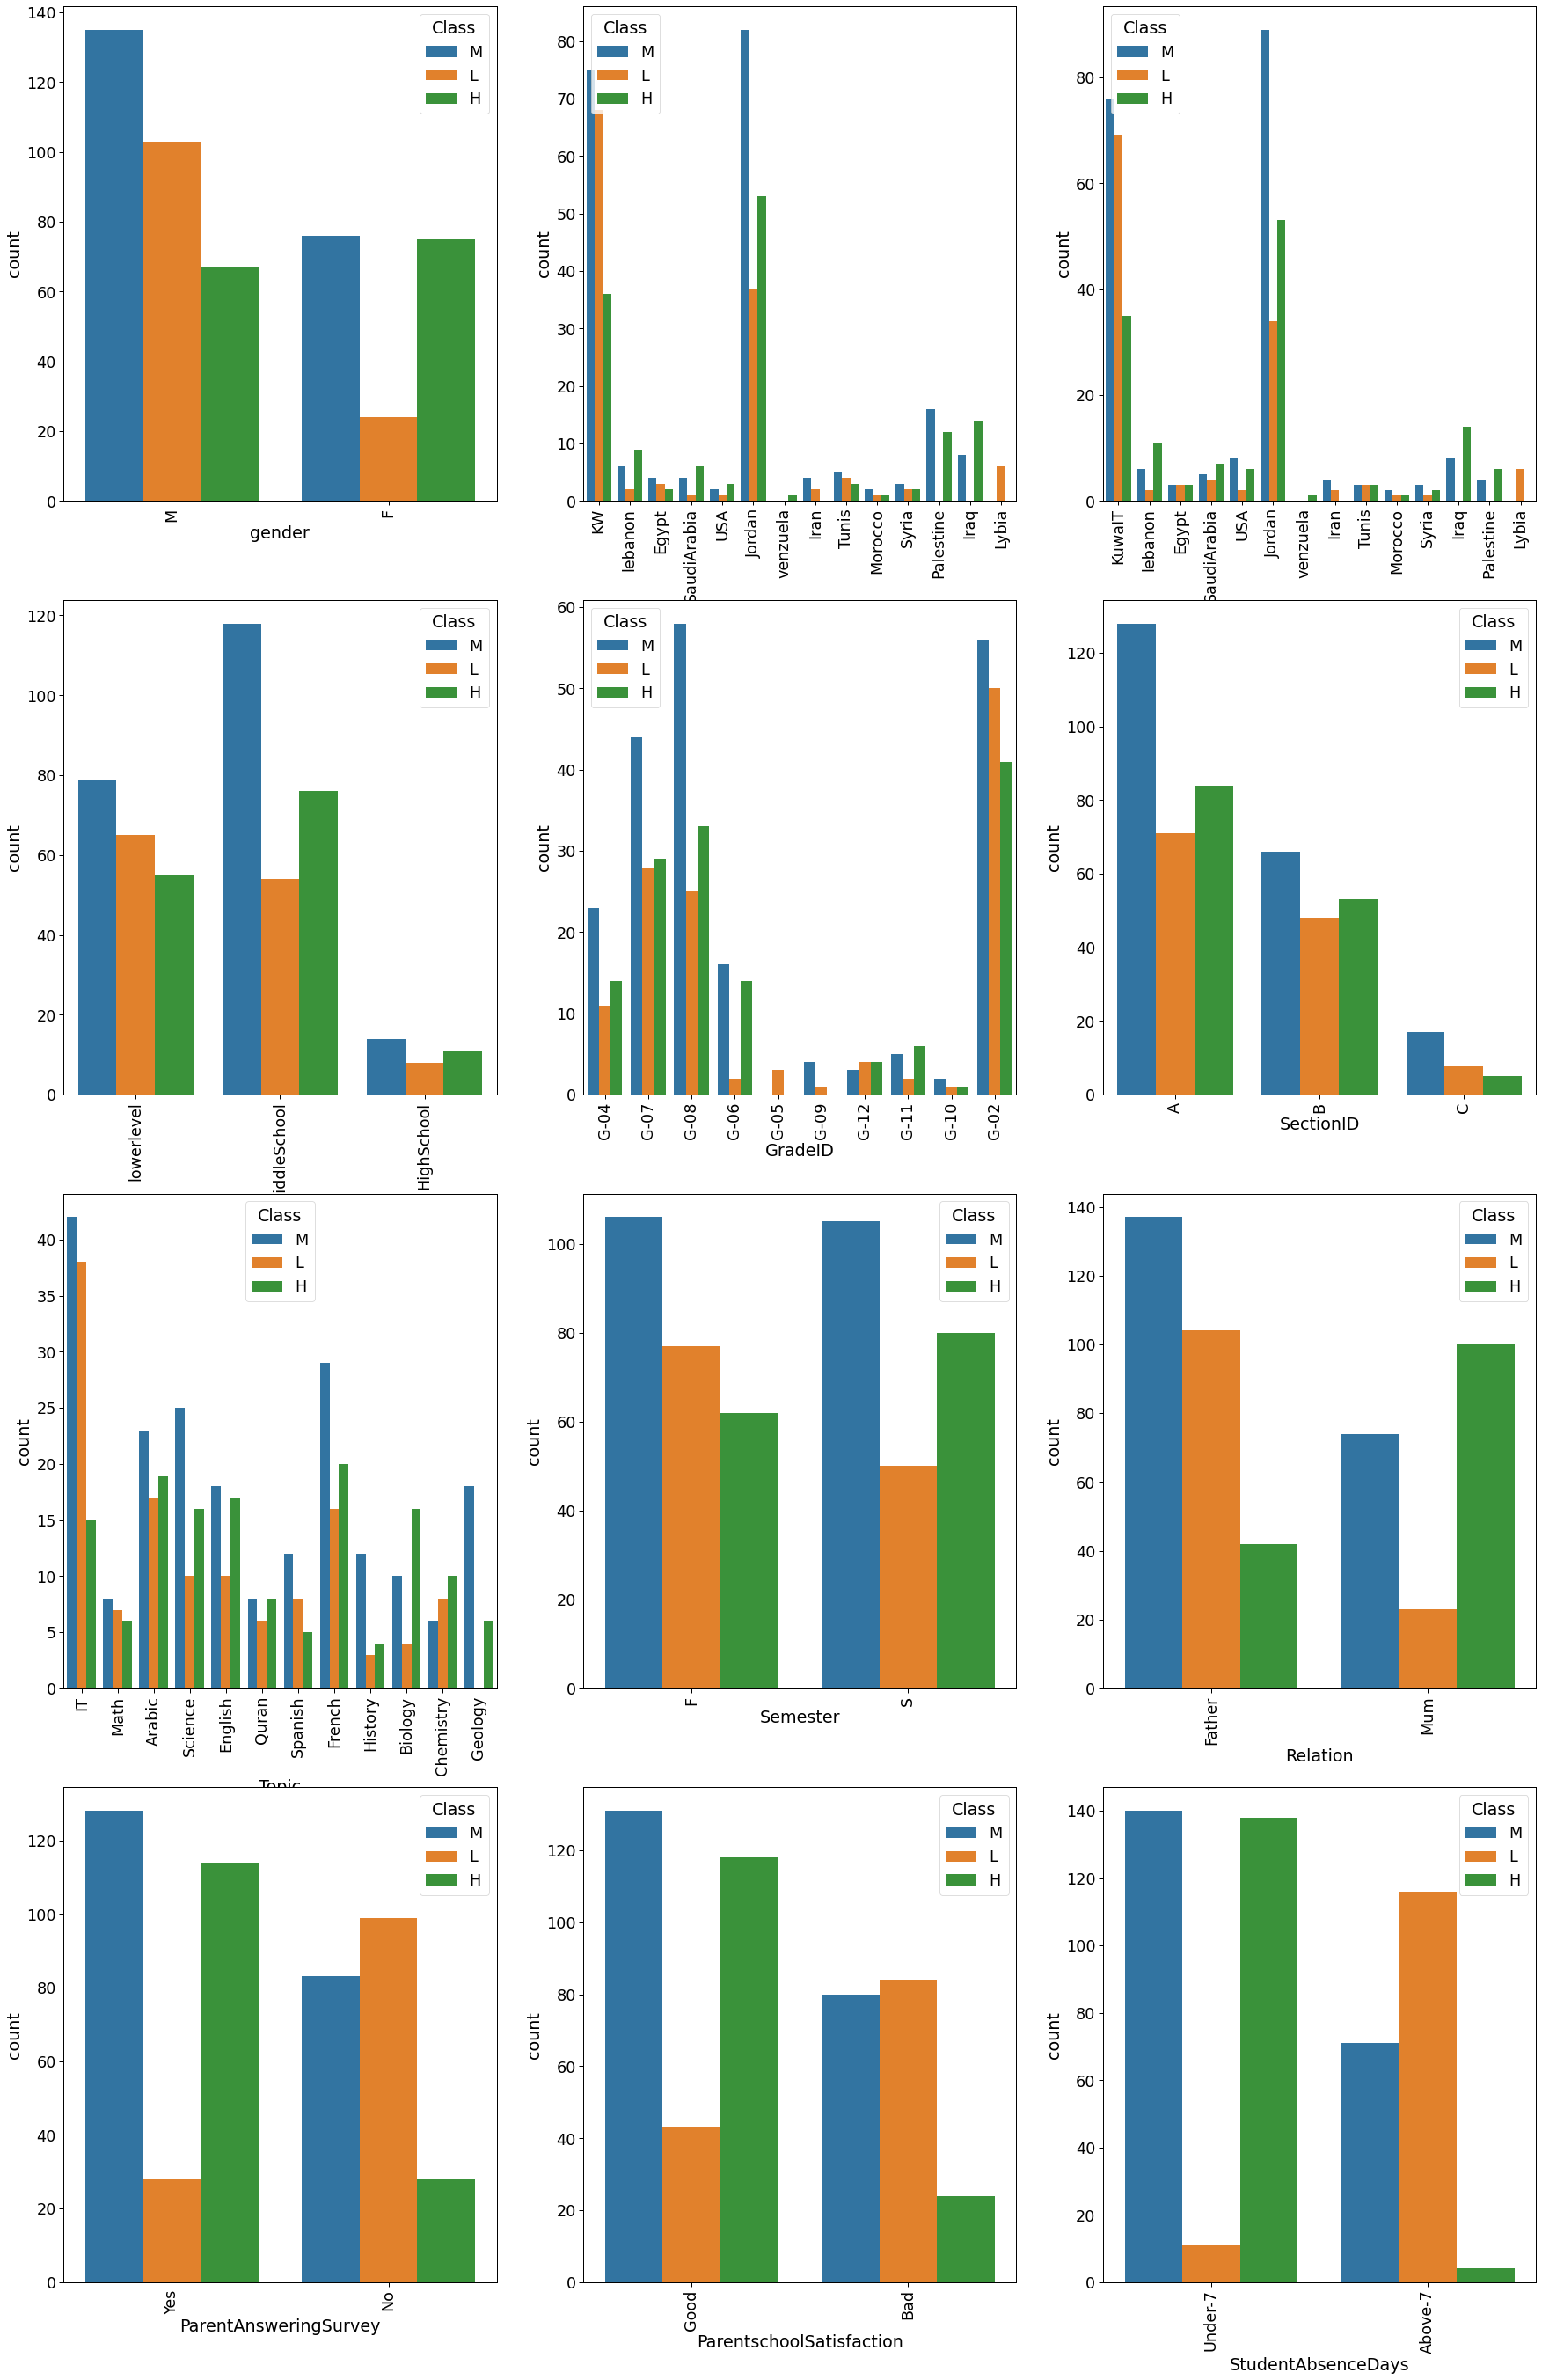

In [8]:
j=1
sns.set_context("paper", font_scale=2.0)
plt.subplots(figsize=(30,60))
for i in df.columns:
    if df[i].dtype==object and j<=12:
        plt.subplot(5,3,j)
        sns.countplot(x=i,hue='Class',data=df)
        plt.xticks(rotation=90)
        j+=1

plt.show()

### Visualize categorical variables with numerical variables

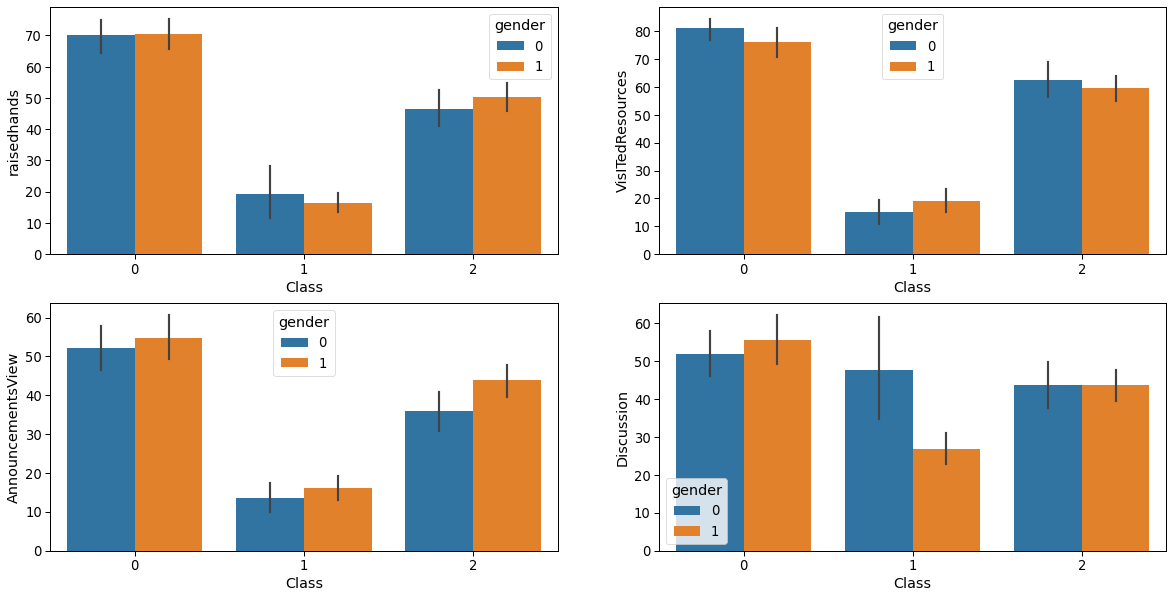

In [14]:
numeric = ['raisedhands','VisITedResources','AnnouncementsView','Discussion']
sns.set_context("paper", font_scale=1.5)
plt.subplots(figsize=(20,10))
count=1
for i in numeric:
    plt.subplot(2,2,count)
    sns.barplot(data=df,x="Class",y=i,hue="gender")
    count=count+1
plt.show()

#### Catergorical and numerical variables show good relation

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

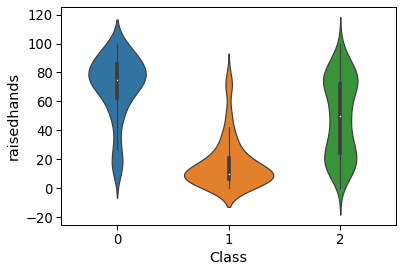

In [15]:
sns.violinplot(x='Class',y='raisedhands',data=df)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

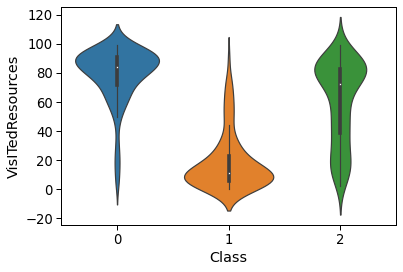

In [16]:
sns.violinplot(x='Class',y='VisITedResources',data=df)

#### Label Encode the Catagorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        print(i)
        df[i]=le.fit_transform(df[i])

gender
NationalITy
PlaceofBirth
StageID
GradeID
SectionID
Topic
Semester
Relation
ParentAnsweringSurvey
ParentschoolSatisfaction
StudentAbsenceDays
Class


In [17]:
X=df.drop(['Class'],axis=1)

In [18]:
y=df['Class']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [42]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)

In [43]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred=model.predict(X_test)
y_pred

array([2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2,
       1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 2, 2, 0, 1, 2])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        34
           1       0.93      0.90      0.92        30
           2       0.81      0.89      0.85        56

    accuracy                           0.85       120
   macro avg       0.87      0.84      0.85       120
weighted avg       0.85      0.85      0.85       120

